In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [101]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [102]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [103]:
df.shape

(1470, 35)

In [104]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [106]:
df.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [107]:
df.duplicated().sum() 

0

In [108]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [109]:
df.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [110]:
df.Attrition.value_counts(normalize=True)*100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

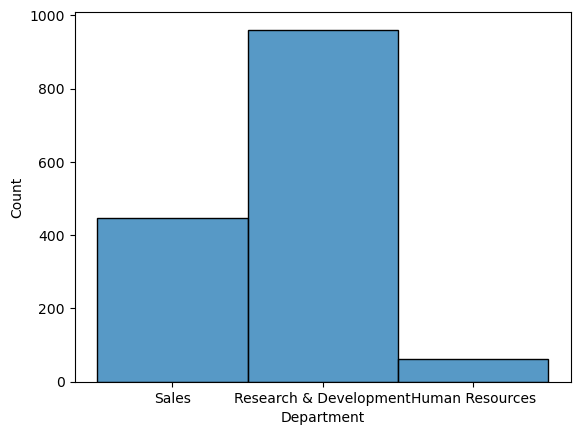

In [111]:
sns.histplot(df['Department'])
plt.show()

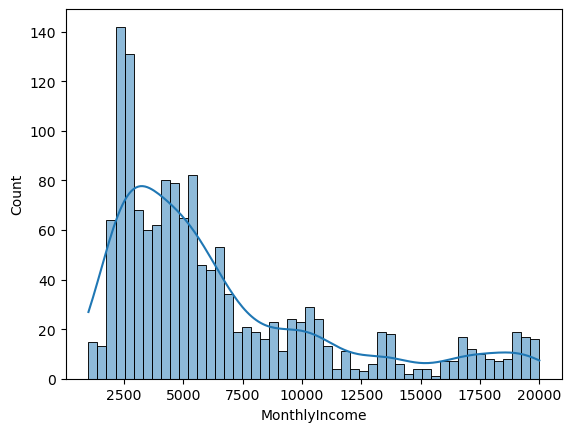

In [112]:
sns.histplot(df['MonthlyIncome'],kde=True,bins=50)
plt.show()

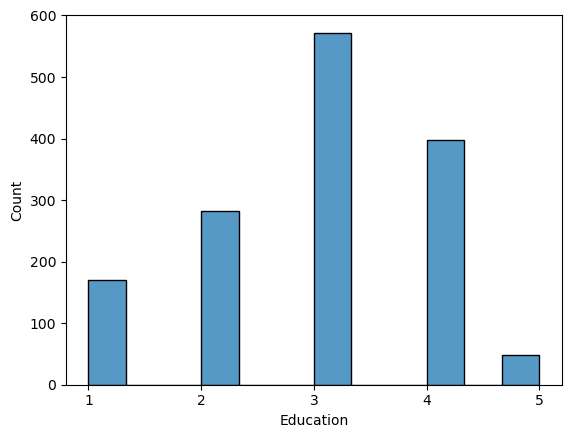

In [113]:
sns.histplot(df['Education'])
plt.xticks([1,2,3,4,5]);
plt.show()

In [114]:
import plotly.graph_objects as go
gender_counts = df['Gender'].value_counts()

colors = ['SkyBlue', 'Lightgreen']  # Specify the colors you want to use

fig = go.Figure(data=[go.Pie(labels=gender_counts.index, values=gender_counts, hole=0.4, marker=dict(colors=colors))])

fig.update_layout(
    title='Gender Distribution'
)

fig.show()

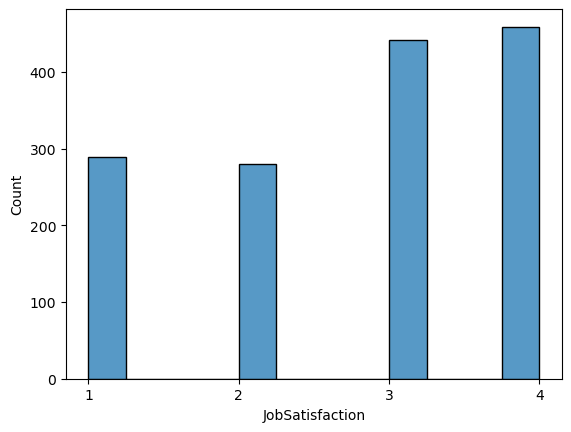

In [115]:
sns.histplot(df['JobSatisfaction'])
plt.xticks([1,2,3,4]);
plt.show()

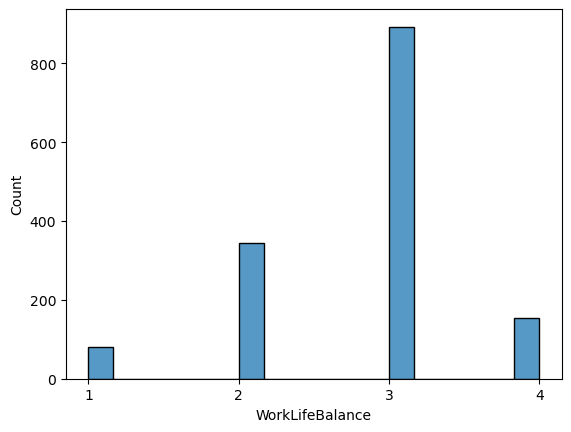

In [116]:
sns.histplot(df['WorkLifeBalance'])
plt.xticks([1,2,3,4]);
plt.show()

In [117]:
fig = px.pie(df, names='MaritalStatus', title='Marital Status', color_discrete_sequence=['#48795E', '#003566', '#707BAD'])
fig.show()

In [118]:
import scipy.stats as sp

def cat_vs_target(df, column):
    temp = df.groupby(column)["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
    temp = temp.sort_values(by='Yes', ascending=False)

    fig, ax = plt.subplots(figsize=(12, 4))  
    temp.plot(kind='bar', stacked=False, colormap='Set2', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    ax.get_legend().remove()
    plt.title('Attrition by ' + column)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height), ha='center')
        
    contingency_table = pd.crosstab(df['Attrition'], df[column])
    chi2, p, dof, expected = sp.chi2_contingency(contingency_table)
    print(f'Chi squared score: {chi2}')
    print(f'p_value: {p}')

def plot_2cols(df, col, plot):
    grp_yes = df[df['Attrition'] == 'Yes'][col]
    grp_no = df[df['Attrition'] == 'No'][col]

    t_score, p_value = sp.ttest_ind(grp_yes, grp_no)
    print(f'T score: {t_score}')
    print(f'p_value: {p_value}')
    
    if plot == 'boxplot':
        sns.boxplot(data=df, y=col, x='Attrition')
    elif plot == 'barplot':
        sns.barplot(data=df, y=col, x='Attrition')
    
    plt.title('Attrition by ' + col)
    plt.show()


T score: -6.178663835307217
p_value: 8.356308021103587e-10


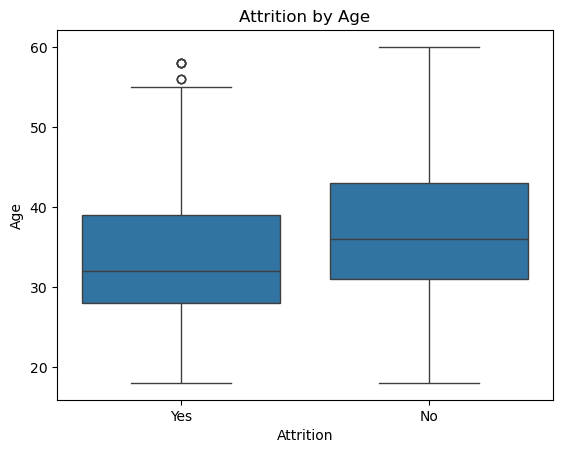

In [119]:
plot_2cols(df,'Age','boxplot')

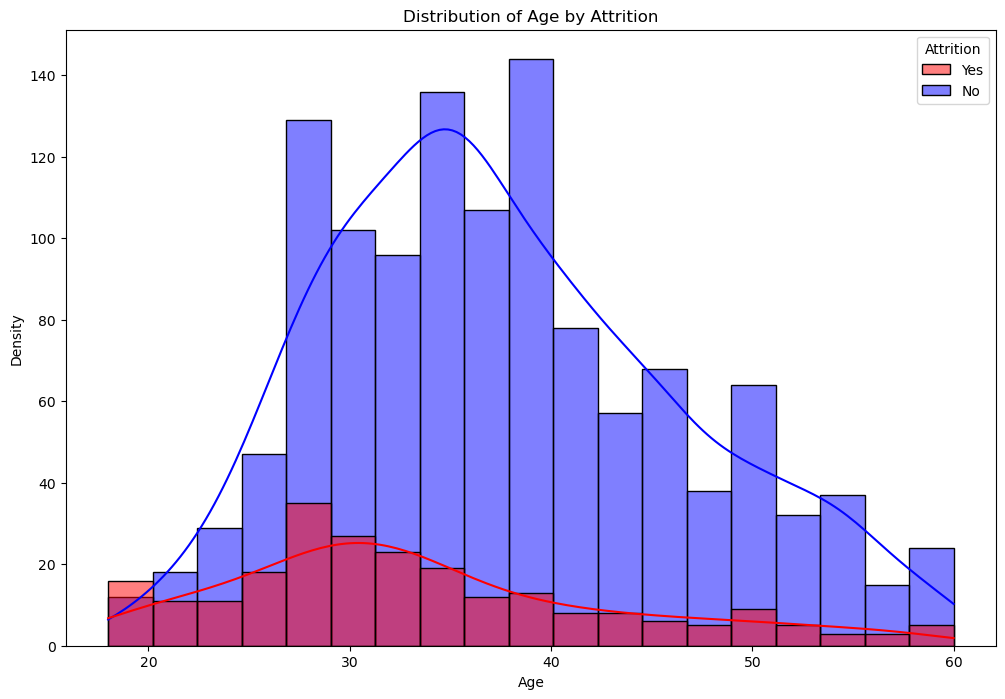

In [120]:
plt.figure(figsize=(12, 8))  # Adjust the figsize according to your desired size

sns.histplot(data=df, x='Age', hue='Attrition', kde=True, palette={'Yes': 'red', 'No': 'blue'})

plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

T score: -2.4548148934297767
p_value: 0.014211054989021307


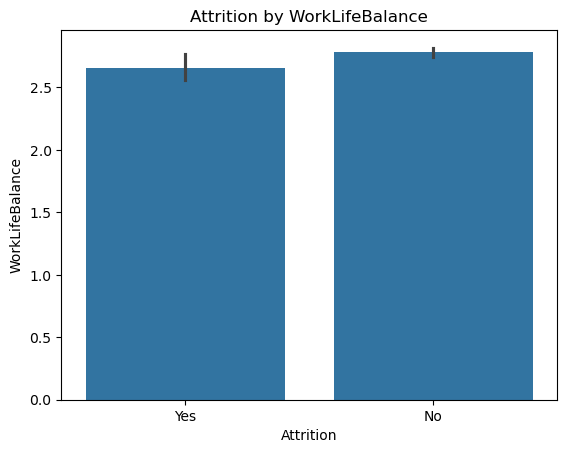

In [121]:
plot_2cols(df,'WorkLifeBalance','barplot')

T score: -6.203935765608938
p_value: 7.147363985353811e-10


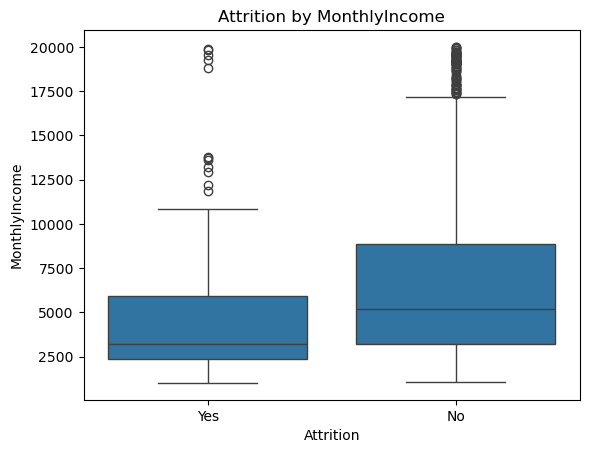

In [122]:
plot_2cols(df,'MonthlyIncome','boxplot')

T score: -5.1963086670254235
p_value: 2.3188716103863036e-07


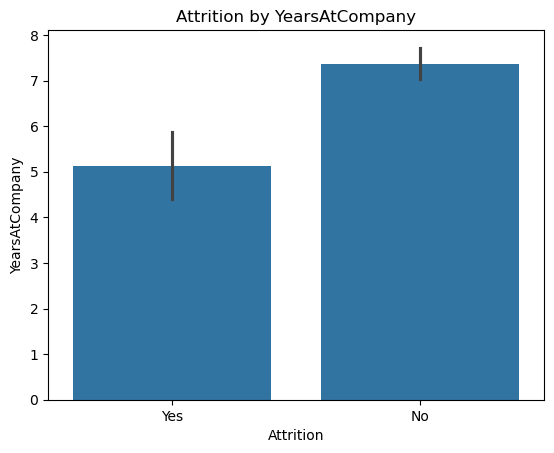

In [123]:
plot_2cols(df,'YearsAtCompany','barplot')

T score: -1.2657876620135298
p_value: 0.2057899591624936


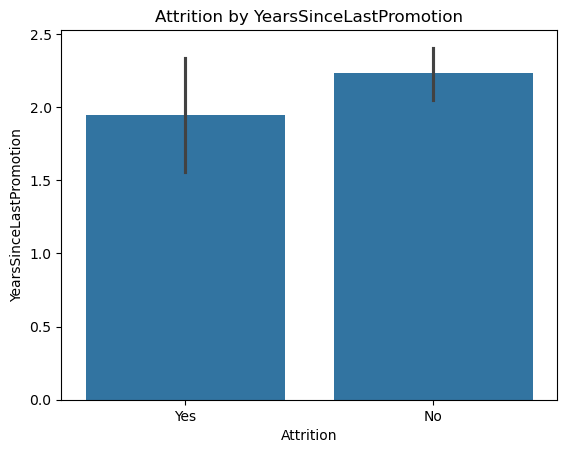

In [124]:
plot_2cols(df,'YearsSinceLastPromotion','barplot')

T score: -6.232038413295282
p_value: 6.003185843641377e-10


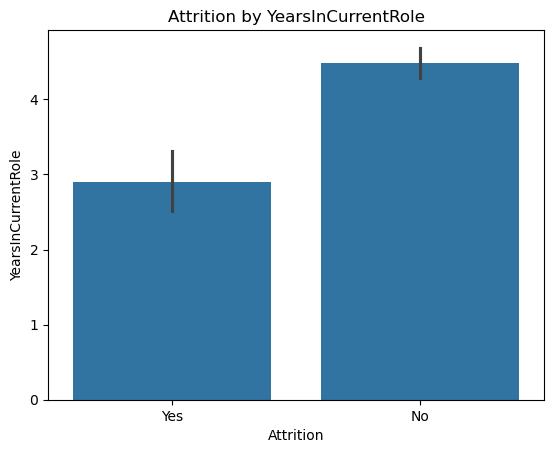

In [125]:
plot_2cols(df,'YearsInCurrentRole','barplot')

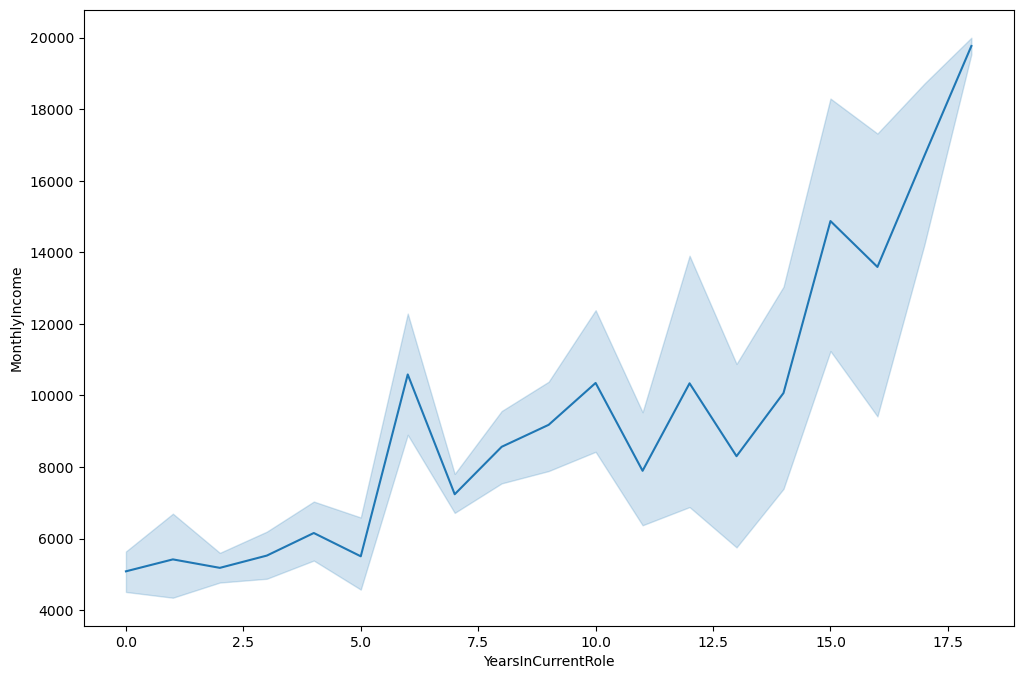

In [126]:
plt.figure(figsize=(12, 8))  

sns.lineplot(data=df, x='YearsInCurrentRole', y='MonthlyIncome')
plt.show()

T score: -0.5164573250747643
p_value: 0.6056128238893757


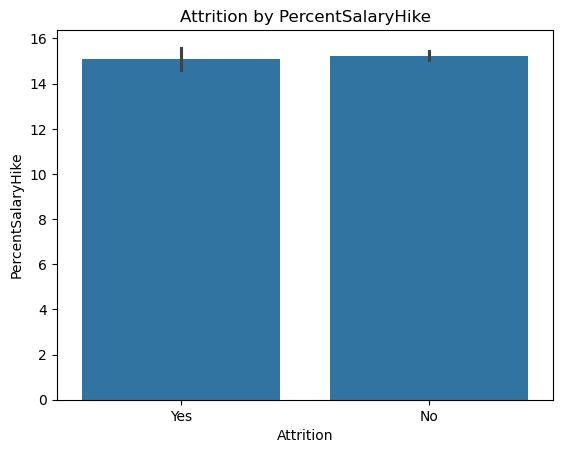

In [127]:
plot_2cols(df,'PercentSalaryHike','barplot')

T score: -0.26228987349264493
p_value: 0.7931347689944243


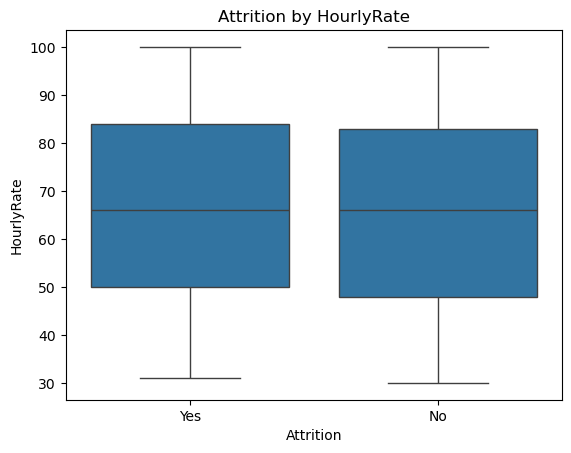

In [128]:
plot_2cols(df,'HourlyRate','boxplot')

T score: 2.994708098265125
p_value: 0.0027930600802134266


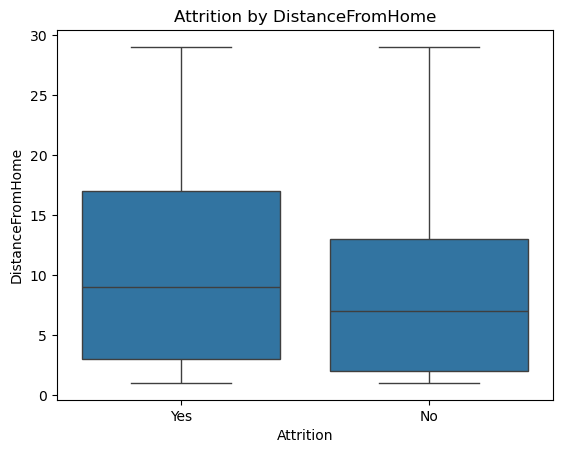

In [129]:
plot_2cols(df,'DistanceFromHome','boxplot')

In [130]:
cat_vs_target(df,'JobSatisfaction')

Chi squared score: 17.505077010348
p_value: 0.0005563004510387556


In [131]:
cat_vs_target(df,'TrainingTimesLastYear')

Chi squared score: 15.146451478483337
p_value: 0.01914772986009514


In [132]:
cat_vs_target(df,'StockOptionLevel')

Chi squared score: 60.59830108612225
p_value: 4.379390336108354e-13


In [133]:
cat_vs_target(df,'MaritalStatus')

Chi squared score: 46.163676540848705
p_value: 9.45551106034083e-11


In [134]:
cat_vs_target(df,'Gender')

Chi squared score: 1.1169671241970975
p_value: 0.29057244902890855


In [135]:
cat_vs_target(df,'Department')

Chi squared score: 10.79600732241067
p_value: 0.004525606574479633


In [136]:
cat_vs_target(df,'PerformanceRating')

Chi squared score: 0.00015475439428271534
p_value: 0.9900745465934576


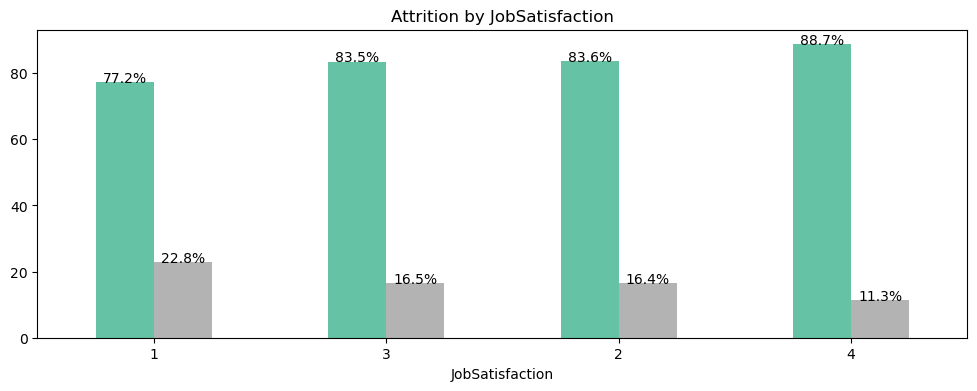

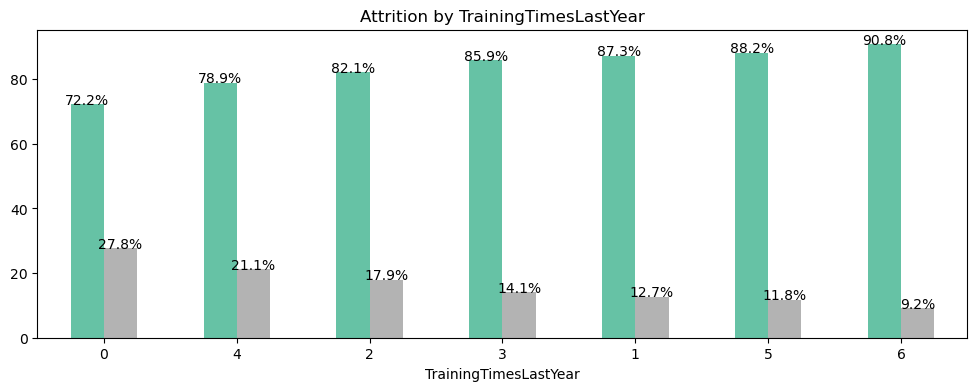

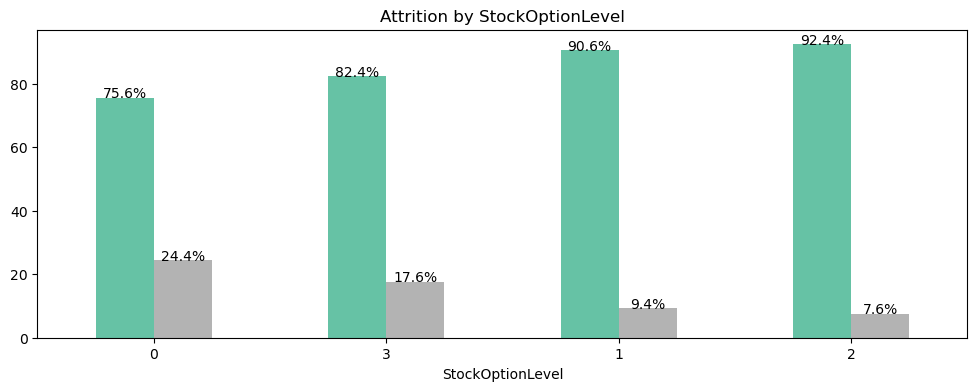

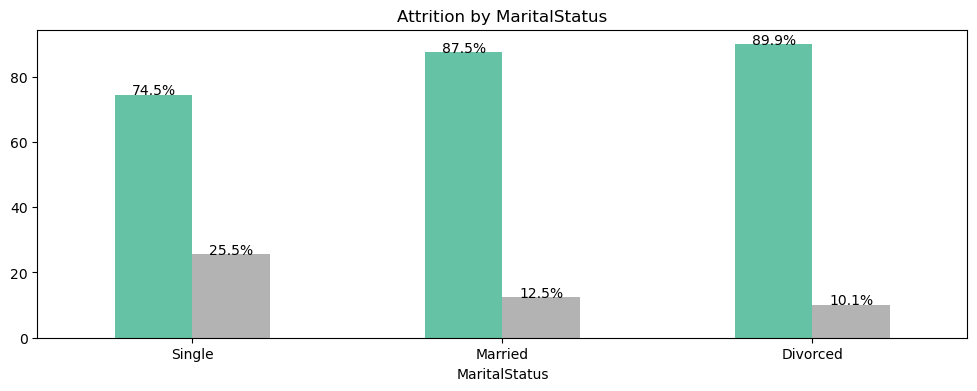

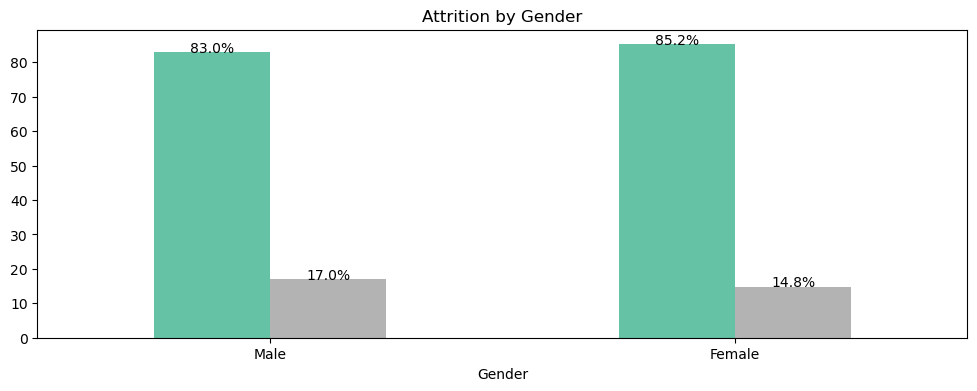

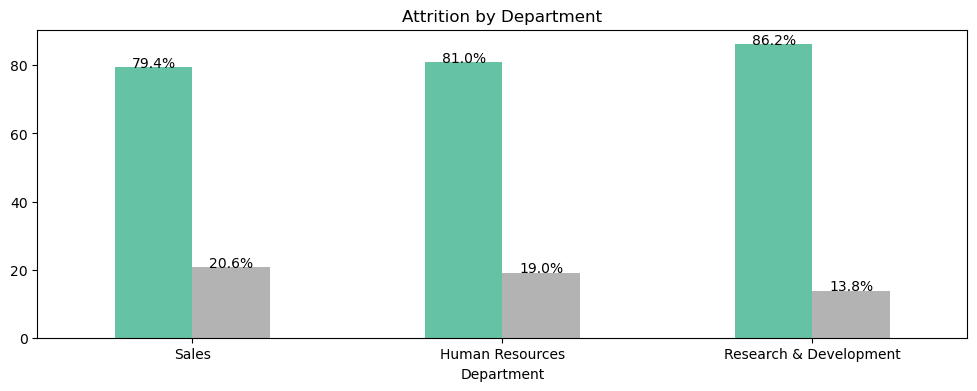

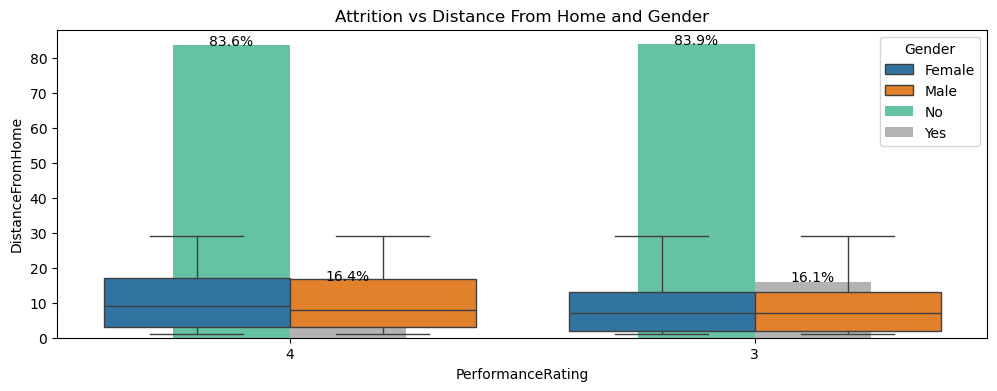

In [137]:
sns.boxplot(df,x='Attrition',y='DistanceFromHome',hue='Gender')
plt.title('Attrition vs Distance From Home and Gender')
plt.show()

In [138]:
plt.figure(figsize=(16,6))
sns.boxplot(df,x='Attrition',y='MonthlyIncome',hue='Department')
plt.title('Attrition by Monthly Income and Department')


Text(0.5, 1.0, 'Attrition by Monthly Income and Department')

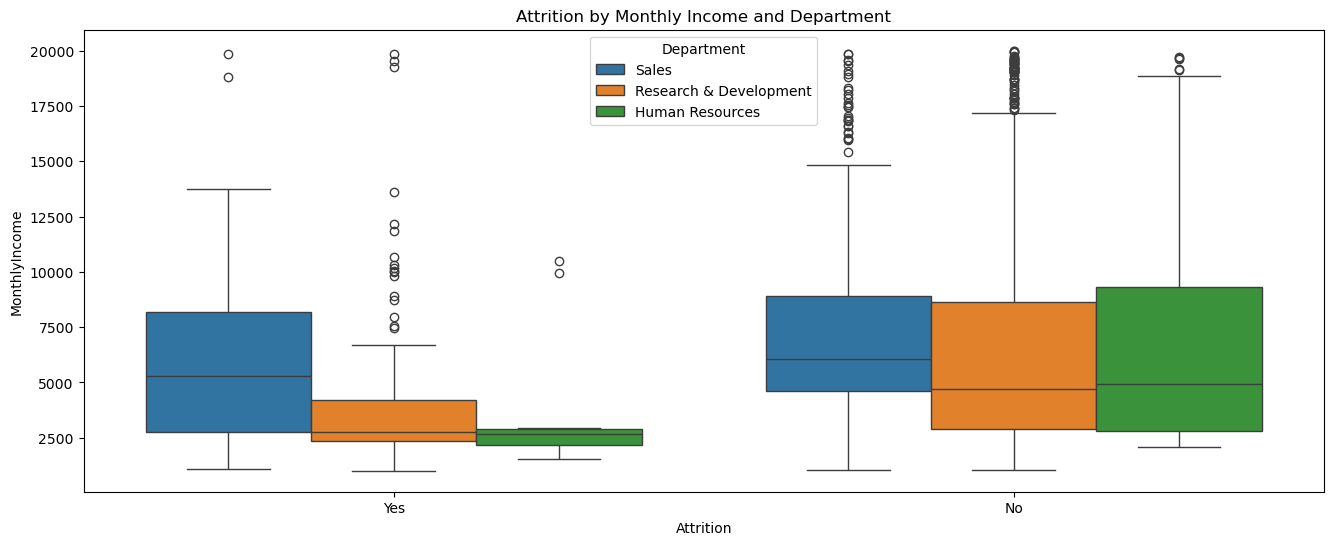

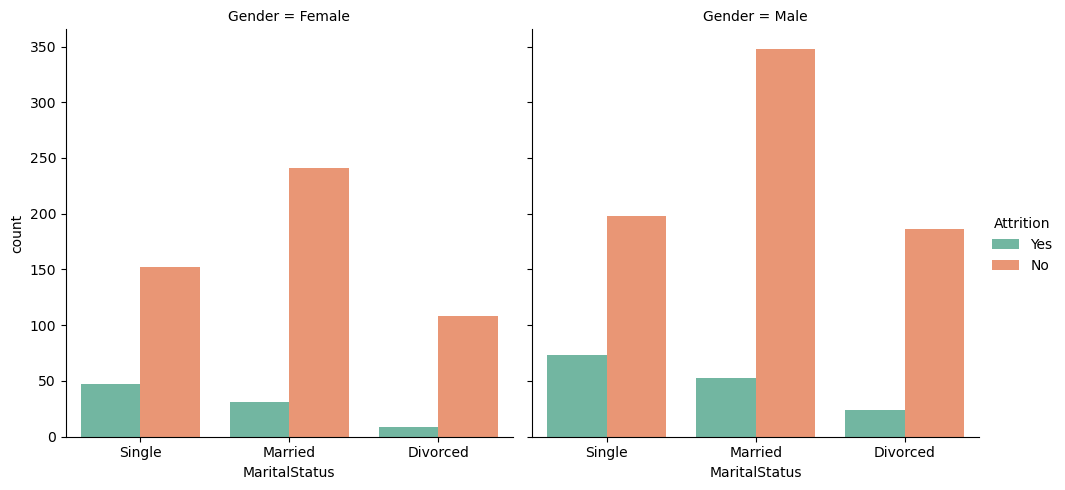

In [139]:
sns.catplot(data=df, kind='count', x='MaritalStatus', hue='Attrition', col='Gender', palette='Set2')
plt.show()

In [181]:
# Drop unnecessary columns (e.g., EmployeeNumber, EmployeeCount, Over18, StandardHours)
df_cleaned = df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])

In [183]:
# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
for column in df_cleaned.select_dtypes(include=['object']).columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

In [185]:
# Split the data into features (X) and target variable (y)
X = df_cleaned.drop(columns=['Attrition'])
y = df_cleaned['Attrition']

In [187]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled numerical features
# y_train and y_test contain the target variable (Attrition)

In [191]:
X_train_scaled

array([[-1.38855944,  0.58928051, -1.10813858, ..., -0.88820751,
        -0.67610953, -1.14244794],
       [-2.04073779, -2.46355596, -1.2634814 , ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       [-0.84507748,  0.58928051,  1.10364737, ..., -0.61136361,
        -0.67610953, -0.57508359],
       ...,
       [-1.60595222, -0.93713773,  1.1258392 , ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       [-0.84507748,  0.58928051,  1.42666182, ..., -0.33451971,
        -0.67610953, -0.29140142],
       [ 1.43754676,  0.58928051, -1.32019386, ..., -1.1650514 ,
        -0.67610953, -1.14244794]])

In [193]:
X_test_scaled

array([[-0.95377387,  0.58928051,  0.16419314, ..., -0.05767581,
        -0.35524399, -0.29140142],
       [ 1.76363593,  0.58928051,  0.70172863, ..., -0.61136361,
        -0.35524399, -0.29140142],
       [-1.38855944,  0.58928051, -1.37937208, ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       ...,
       [ 1.43754676,  0.58928051,  1.28857931, ..., -0.61136361,
        -0.35524399, -0.57508359],
       [ 0.02449366,  0.58928051,  1.04940067, ..., -1.1650514 ,
        -0.67610953, -1.14244794],
       [ 1.11145758,  0.58928051, -1.35718025, ...,  0.49601198,
         1.56994925,  0.84332728]])

In [195]:
# table of all models

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB()]

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC', 'Naive Bayes']

accuracy = []
roc_auc = []

for i in models:
    i.fit(X_train_scaled, y_train)
    y_pred = i.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,ROC AUC
0,Logistic Regression,0.894558,0.667722
4,SVC,0.887755,0.576923
2,Random Forest,0.874150,0.547360
3,KNN,0.860544,0.506938
5,Naive Bayes,0.843537,0.736048
1,Decision Tree,0.789116,0.552640


In [197]:
# hyperparameter tuning of all models

for i in models:
    hyperparameters = dict()
    if i == LogisticRegression():
        hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == DecisionTreeClassifier():
        hyperparameters = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == RandomForestClassifier():
        hyperparameters = {'n_estimators': [10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
    elif i == KNeighborsClassifier():
        hyperparameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    elif i == SVC():
        hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    elif i == GaussianNB():
        hyperparameters = {}
    clf = GridSearchCV(i, hyperparameters, cv=5)
    best_model = clf.fit(X_train_scaled, y_train)
    print(best_model.best_estimator_)
    print(best_model.best_score_)
    print(best_model.best_params_)

LogisticRegression()
0.8520447169130906
{}
DecisionTreeClassifier()
0.7806022358456545
{}
RandomForestClassifier()
0.856289217454021
{}
KNeighborsClassifier()
0.8350414713306888
{}
SVC()
0.8486512802019472
{}
GaussianNB()
0.7823332131265777
{}


In [199]:
# Define the models with hyperparameters
models = [
    LogisticRegression(C=0.001, penalty='l2'), 
    DecisionTreeClassifier(criterion='entropy', max_depth=3), 
    RandomForestClassifier(max_features='sqrt', n_estimators=100), 
    KNeighborsClassifier(n_neighbors=1), 
    SVC(C=0.001, kernel='linear'), 
    GaussianNB()
]

# Define the names of the models
model_names = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'KNN', 
    'SVC', 
    'Naive Bayes'
]

accuracy = []
roc_auc = []

# Train each model, make predictions, and calculate accuracy and ROC AUC
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

# Create a DataFrame to compare models
model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy, 'ROC AUC': roc_auc})

# Sort the DataFrame by accuracy in descending order
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)


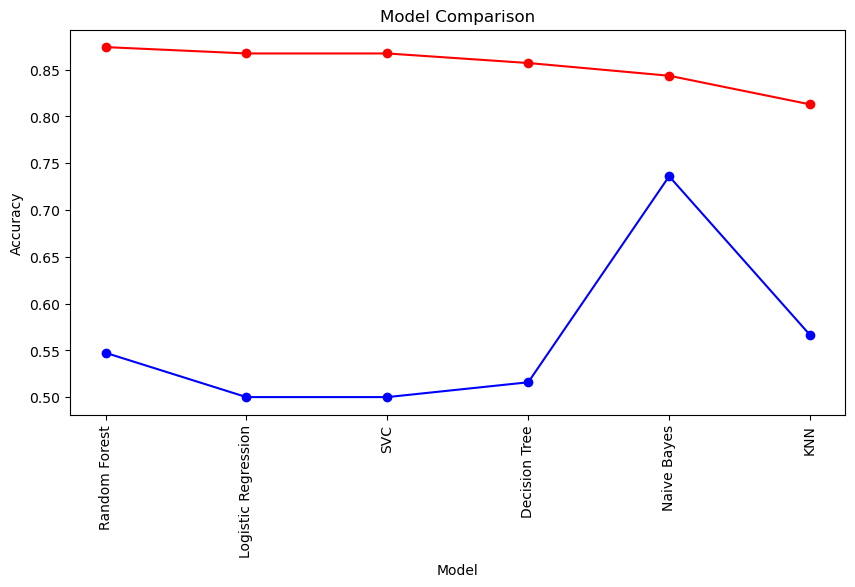

In [201]:
# model comparison

plt.figure(figsize=(10, 5))
plt.plot(model_comparison['Model'], model_comparison['Accuracy'], color='red', marker='o')
plt.plot(model_comparison['Model'], model_comparison['ROC AUC'], color='blue', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

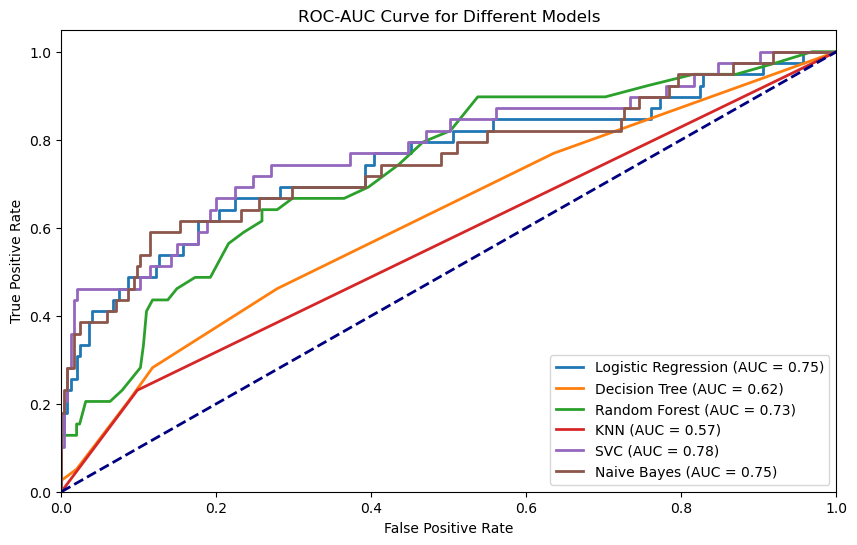

In [203]:
from sklearn.metrics import roc_curve, auc
# Plot ROC-AUC curve for each model
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

0.8775510204081632
0.5601809954751131


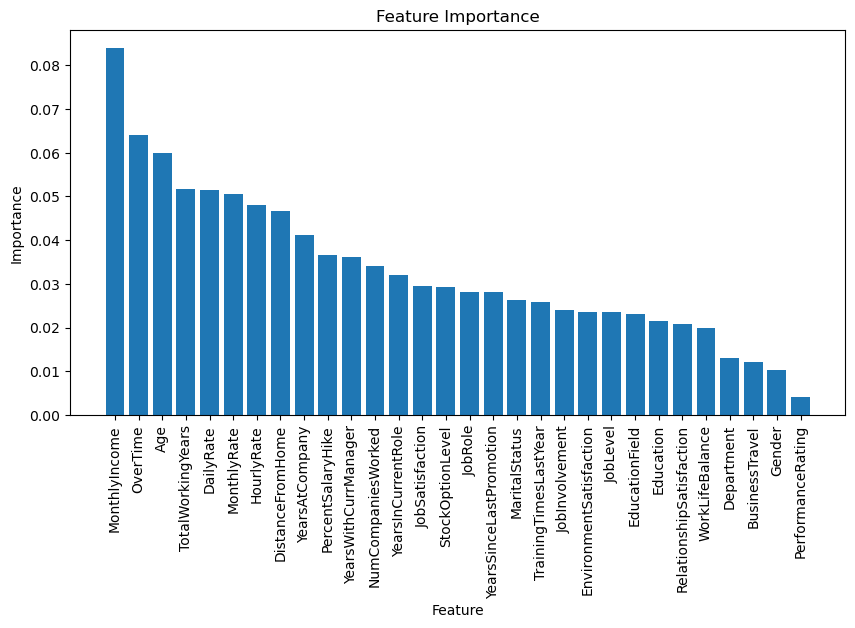

In [205]:
# feature importance plot

model = RandomForestClassifier(max_features='sqrt', n_estimators=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [207]:
# Final Results 

#  Random Forest

rf = RandomForestClassifier(max_features='sqrt', n_estimators=100)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

Accuracy Score:  0.8741496598639455
ROC AUC Score:  0.5473604826546004


In [209]:
print('Classification Report: ', classification_report(y_test, y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



In [211]:
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[253   2]
 [ 35   4]]
